In [1]:
from google.colab import drive

PATH = "/content/drive/MyDrive/MSc /Narratives Project Nadav/analysis/data/raw"
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np

# Load Excel file
df = pd.read_excel(os.path.join(PATH,"storeleads_clean_sample.xlsx"))

# Save as CSV
df.to_csv(os.path.join(PATH,"clean_sample_df.csv"), index=False, encoding="utf-8")

print("✅ Conversion complete: your_file.csv")


✅ Conversion complete: your_file.csv


In [4]:
import os
import pandas as pd
import numpy as np
data_path = os.path.join(PATH, "clean_sample_df.csv")
#data_path = os.path.join(PATH, "storeleads-scraping-about_data_toclean.dta")
df = pd.read_csv(data_path)
#df = pd.read_stata(data_path)



df.dropna(inplace=True)

print(len(df))

display(df.head())


996


url country_code language  \
0    rosesofertas.com           BR       pt   
1        hanibags.com           DE       en   
2         osonian.com           LB       en   
3  lavatoriabrand.com           US       en   
4          selinni.nl           NL       nl   

                                                text  \
0  Quem Somos Frete Grátis para todo o Brasil Tro...   
1  About Us BIG SALE Is Live Now!!About HANI Bags...   
2  ABOUT US $0.00  “Osonian” fashion merged into ...   
3  About us We pride ourselves in creating a blis...   
4  Over ons We ♡ service: klantwaardering 9.5 | B...   

                                          text_clean  
0  We are grateful to have found you. We work wit...  
1  Hani Bags is an authentic and trustworthy emer...  
2  “Osonian” fashion merged into nature! Establis...  
3  We pride ourselves in creating a blissful expe...  
4  We ♡ service: klantwaardering 9.5 | Bezorgen i...

In [46]:
# save first few rows as csv
df.head(20).to_csv( "sample.csv", index=False)

# Conceptual Construct Representations

In [6]:
from utils import ccr_wrapper

ccr_result_dataframe = ccr_wrapper(data_file=data_path,
                                       data_col='text_clean',
                                       q_file='values_questionnaire.csv',
                                       q_col = 'question')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/sentence_transformers/util.py:44: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  a = torch.tensor(a)


In [7]:

import pandas as pd
from data_utils import rename_qid_cols
rename_qid_cols(ccr_result_dataframe)

display(ccr_result_dataframe.head(3))

✅ Column names updated successfully! Saved as 'updated_table.csv'.


url country_code language  \
0  rosesofertas.com           BR       pt   
1      hanibags.com           DE       en   
2       osonian.com           LB       en   

                                                text  \
0  Quem Somos Frete Grátis para todo o Brasil Tro...   
1  About Us BIG SALE Is Live Now!!About HANI Bags...   
2  ABOUT US $0.00  “Osonian” fashion merged into ...   

                                          text_clean  \
0  We are grateful to have found you. We work wit...   
1  Hani Bags is an authentic and trustworthy emer...   
2  “Osonian” fashion merged into nature! Establis...   

                                           embedding  sim_item_HI1  \
0  [-0.042597078, 0.052100614, 0.019639159, -0.03...      0.035290   
1  [-0.019837914, 0.021388814, 0.047967702, 0.044...      0.103616   
2  [0.007204165, -0.03801949, 0.037576985, 0.1044...      0.023403   

   sim_item_HI2  sim_item_HI3  sim_item_HI4  ...  sim_item_VI3  sim_item_VI4  \
0      0.099446      0.113445      0.266028  ...      0.002356     -0.059870   
1      0.137939      0.116476      0.074621  ...      0.019883      0.010902   
2     -0.000257      0.102358      0.050896  ...      0.207150      0.034395   

   sim_item_HC1  sim_item_HC2  sim_item_HC3  sim_item_HC4  sim_item_VC1  \
0      0.109016      0.106477      0.041501      0.091570      0.038916   
1      0.095948      0.031019      0.086760      0.115418      0.014454   
2      0.034070      0.024154      0.089663      0.061105      0.034665   

   sim_item_VC2  sim_item_VC3  sim_item_VC4  
0      0.130867      0.025557      0.115712  
1      0.150338      0.082960      0.132639  
2      0.074154      0.018021      0.052641  

[3 rows x 22 columns]

In [9]:
ccr_result_dataframe.to_csv(os.path.join(PATH, "ccr_result_sample1000.csv"), index=False)

In [8]:
from data_utils import compute_dimension_scores

# Load the questionnaire to map each question_id to a dimension
q_df = pd.read_csv("values_questionnaire.csv")  # columns: question_id, dimension, question

# Build a dict: question_id -> dimension
dimension_map = dict(zip(q_df["question_id"], q_df["dimension"]))

ccr_result_dataframe = compute_dimension_scores(ccr_result_dataframe, dimension_map)
display(ccr_result_dataframe.head(3))


{'HI1': 'Horizontal Individualism', 'HI2': 'Horizontal Individualism', 'HI3': 'Horizontal Individualism', 'HI4': 'Horizontal Individualism', 'VI1': 'Vertical Individualism', 'VI2': 'Vertical Individualism', 'VI3': 'Vertical Individualism', 'VI4': 'Vertical Individualism', 'HC1': 'Horizontal Collectivism', 'HC2': 'Horizontal Collectivism', 'HC3': 'Horizontal Collectivism', 'HC4': 'Horizontal Collectivism', 'VC1': 'Vertical Collectivism', 'VC2': 'Vertical Collectivism', 'VC3': 'Vertical Collectivism', 'VC4': 'Vertical Collectivism'}


url country_code language  \
0  rosesofertas.com           BR       pt   
1      hanibags.com           DE       en   
2       osonian.com           LB       en   

                                                text  \
0  Quem Somos Frete Grátis para todo o Brasil Tro...   
1  About Us BIG SALE Is Live Now!!About HANI Bags...   
2  ABOUT US $0.00  “Osonian” fashion merged into ...   

                                          text_clean  \
0  We are grateful to have found you. We work wit...   
1  Hani Bags is an authentic and trustworthy emer...   
2  “Osonian” fashion merged into nature! Establis...   

                                           embedding  sim_item_HI1  \
0  [-0.042597078, 0.052100614, 0.019639159, -0.03...      0.035290   
1  [-0.019837914, 0.021388814, 0.047967702, 0.044...      0.103616   
2  [0.007204165, -0.03801949, 0.037576985, 0.1044...      0.023403   

   sim_item_HI2  sim_item_HI3  sim_item_HI4  ...  sim_item_HC3  sim_item_HC4  \
0      0.099446      0.113445      0.266028  ...      0.041501      0.091570   
1      0.137939      0.116476      0.074621  ...      0.086760      0.115418   
2     -0.000257      0.102358      0.050896  ...      0.089663      0.061105   

   sim_item_VC1  sim_item_VC2  sim_item_VC3  sim_item_VC4  \
0      0.038916      0.130867      0.025557      0.115712   
1      0.014454      0.150338      0.082960      0.132639   
2      0.034665      0.074154      0.018021      0.052641   

   Horizontal Individualism_score  Vertical Individualism_score  \
0                        0.128552                      0.018483   
1                        0.108163                      0.032536   
2                        0.044100                      0.092754   

   Horizontal Collectivism_score  Vertical Collectivism_score  
0                       0.087141                     0.077763  
1                       0.082287                     0.095098  
2                       0.052248                     0.044870  

[3 rows x 26 columns]

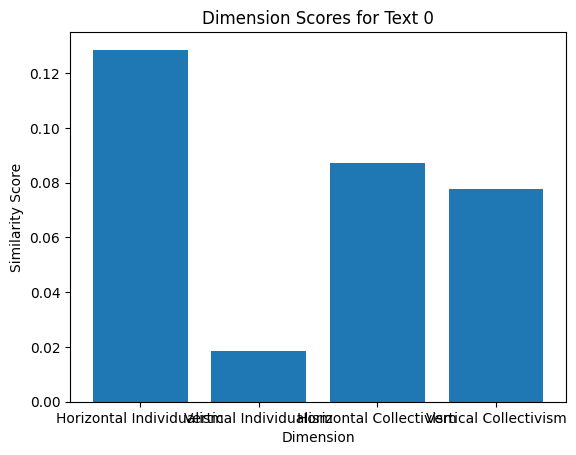

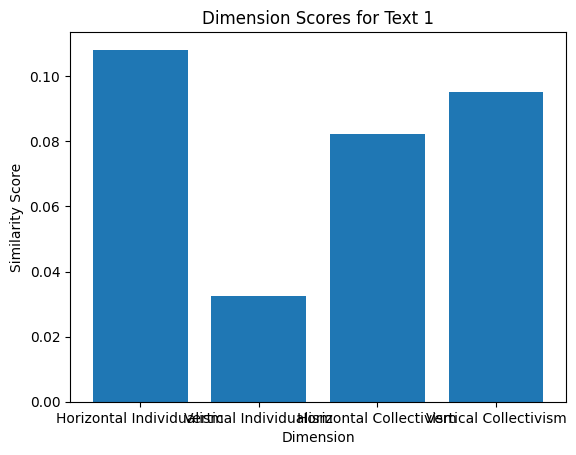

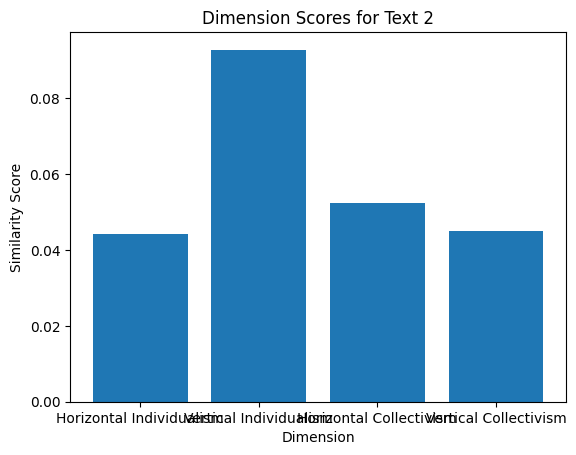

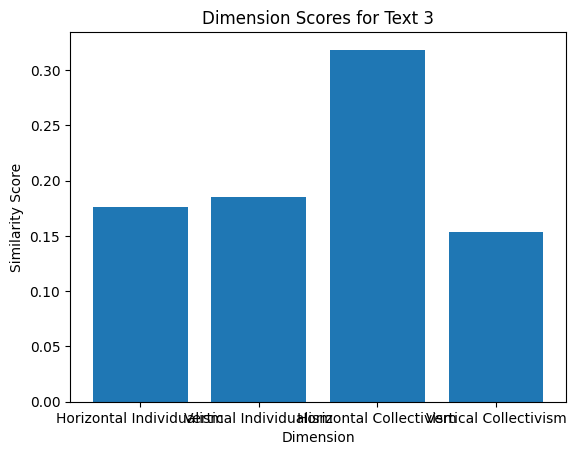

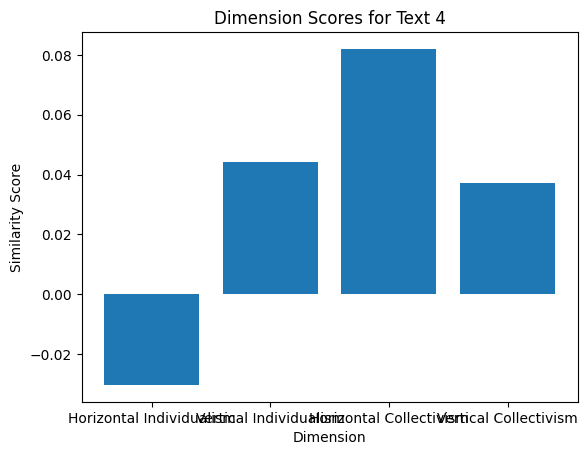

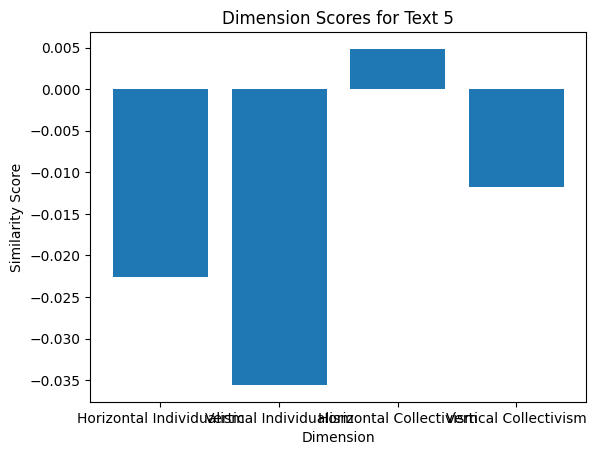

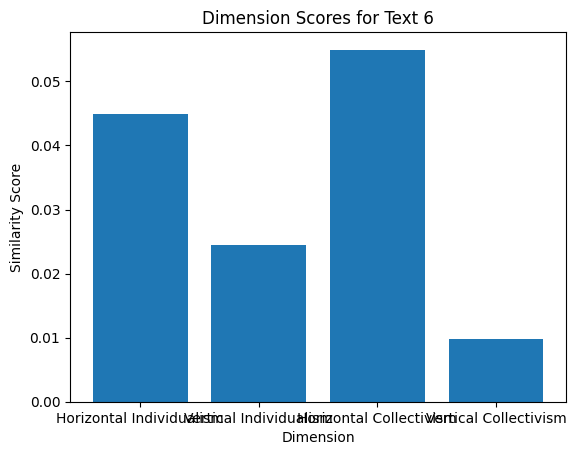

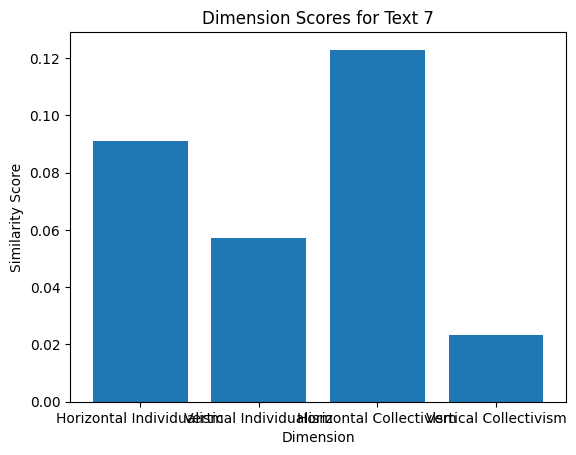

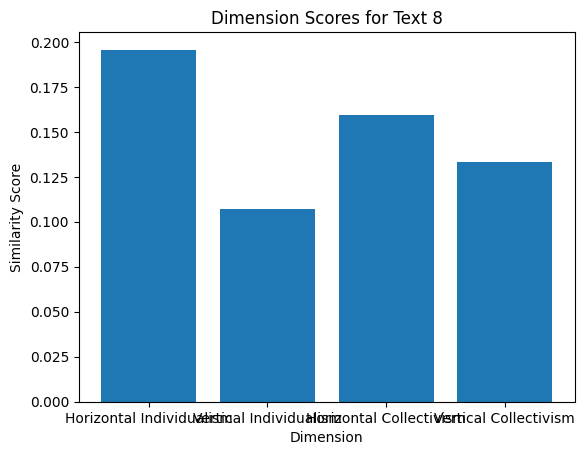

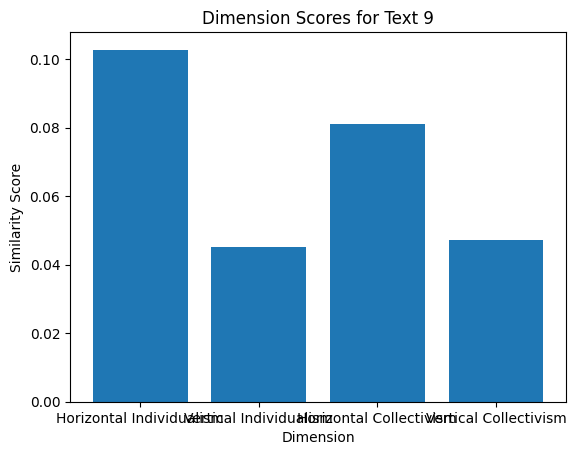

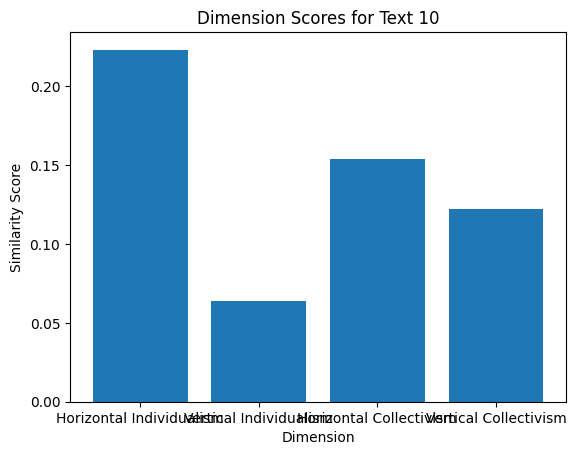

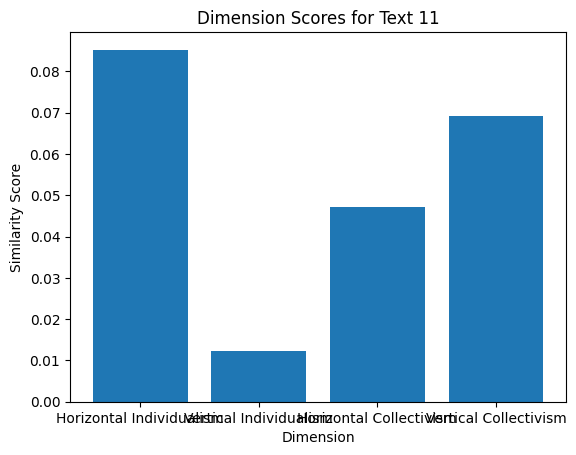

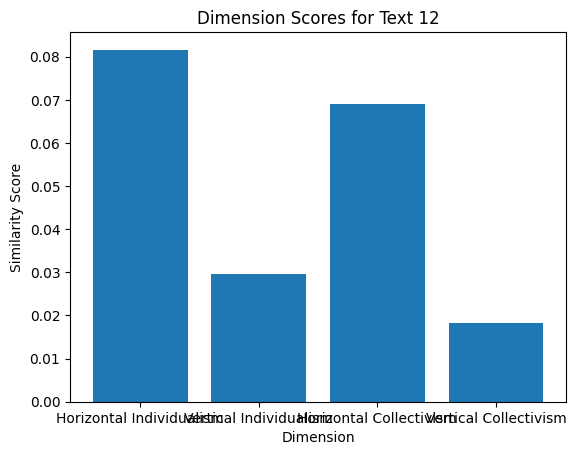

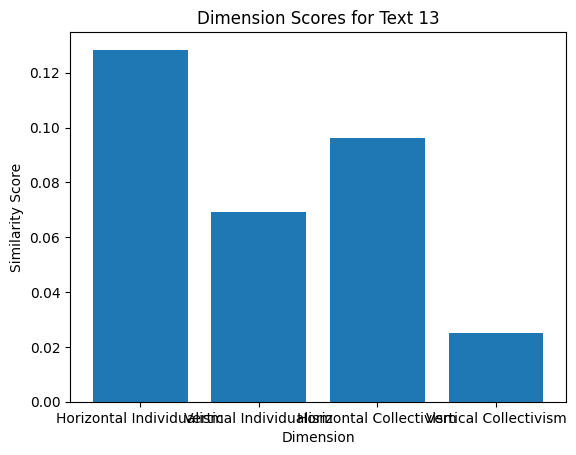

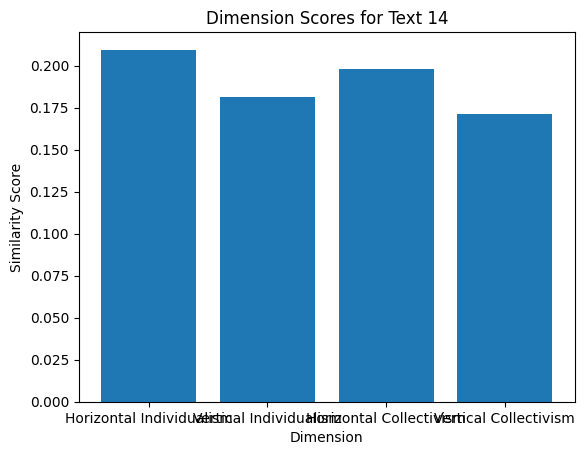

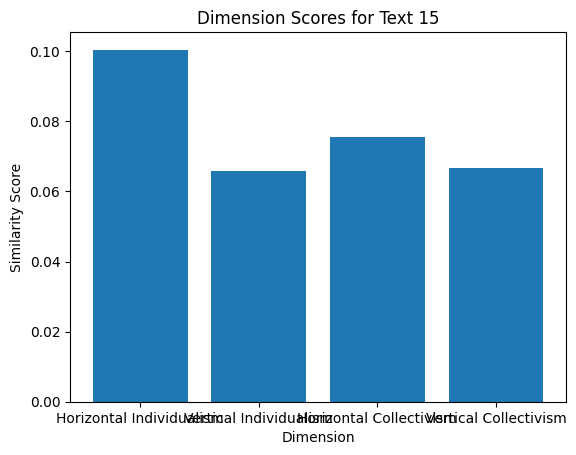

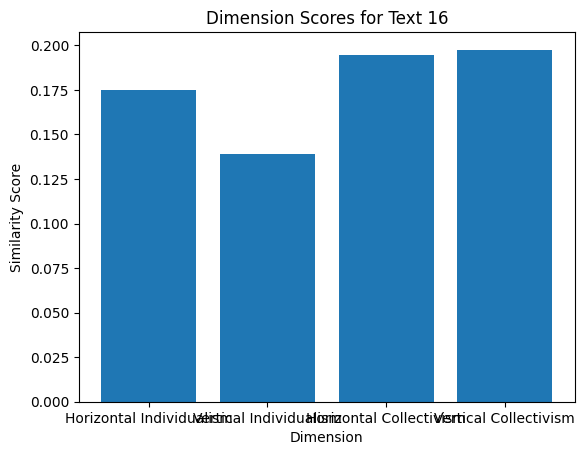

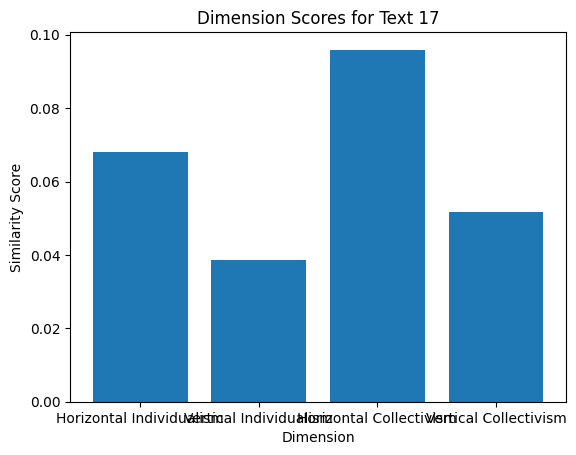

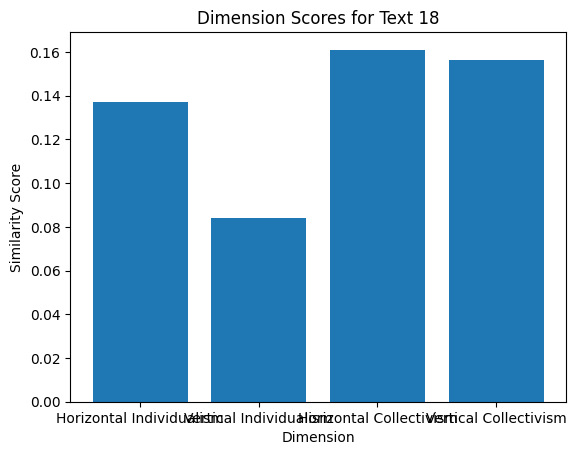

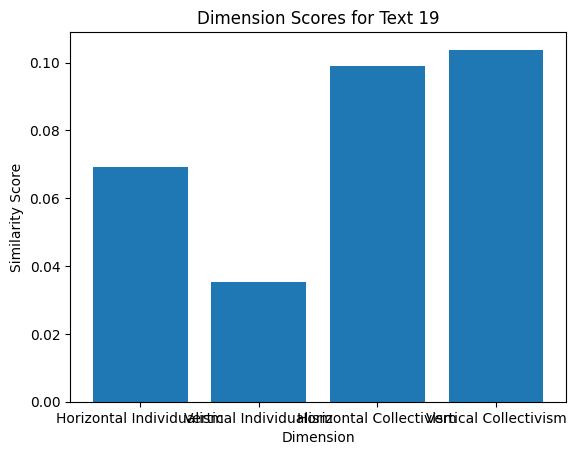

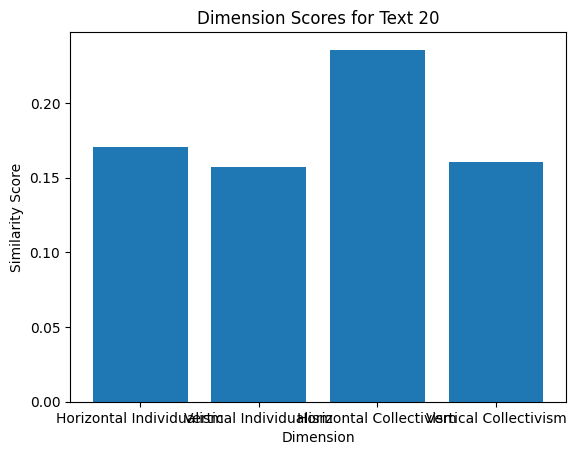

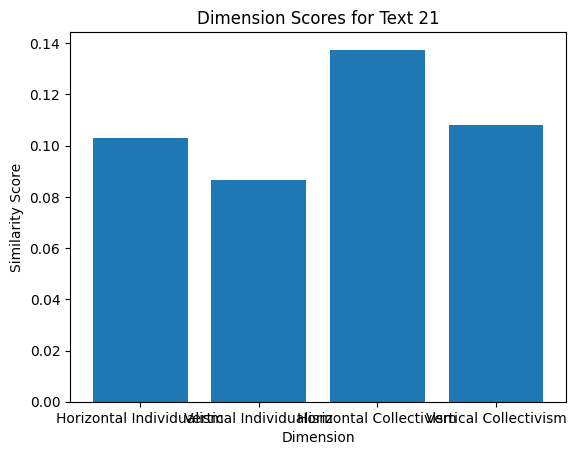

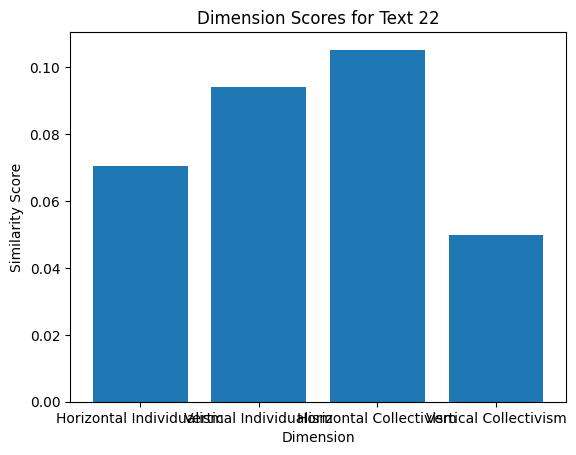

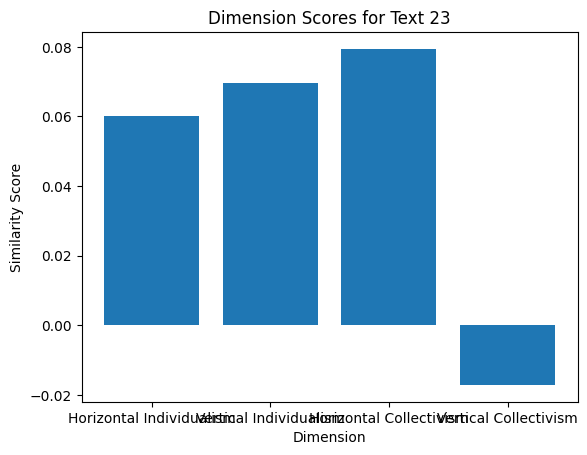

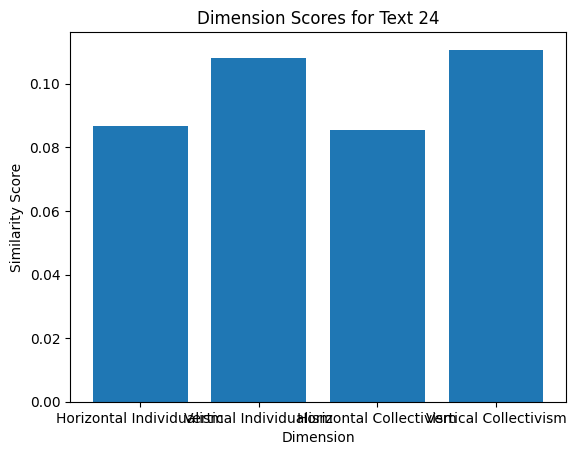

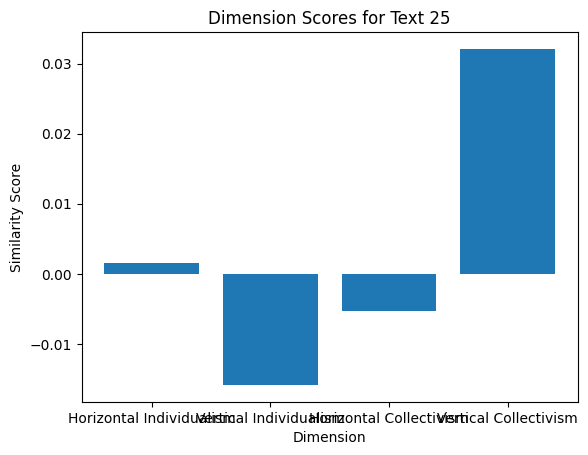

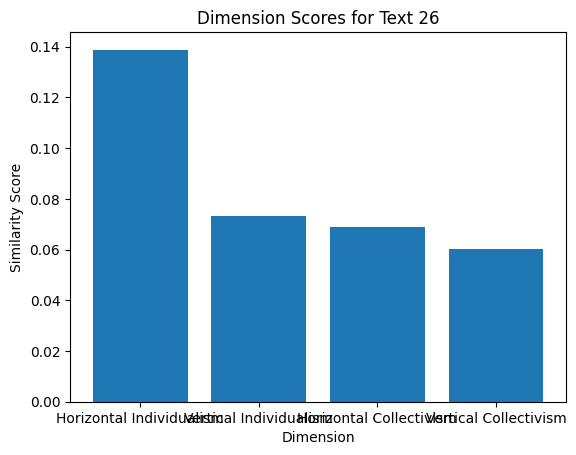

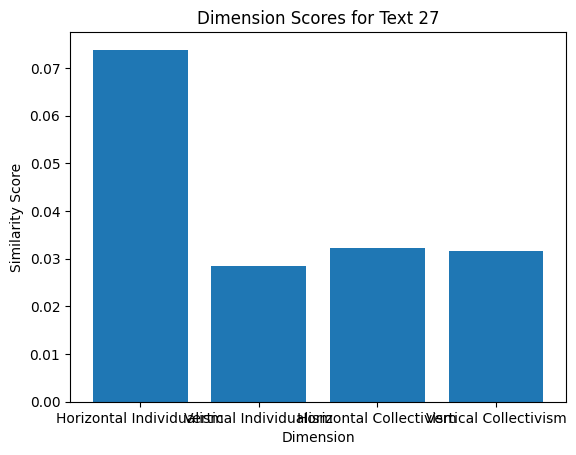

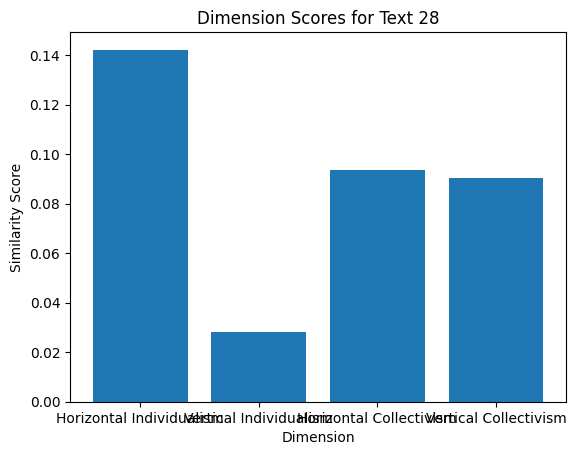

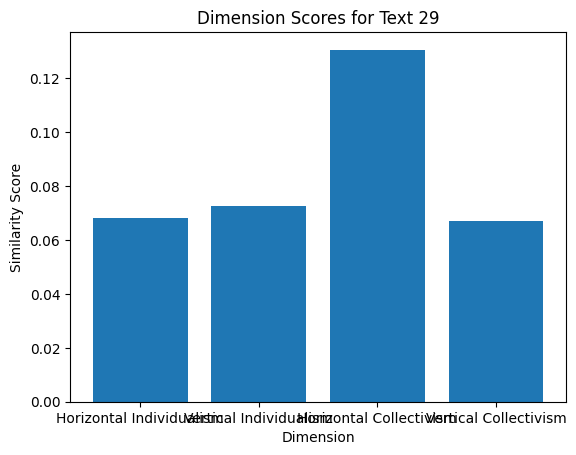

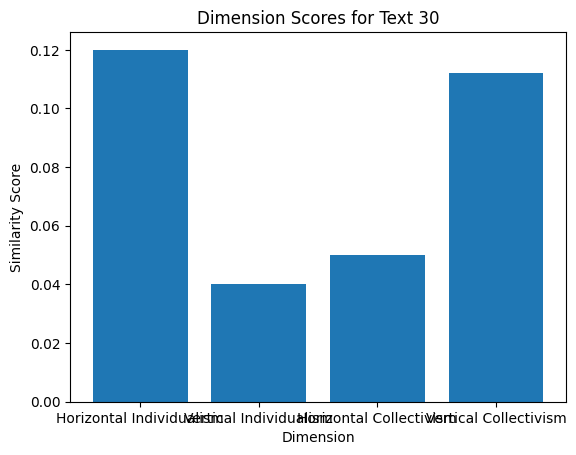

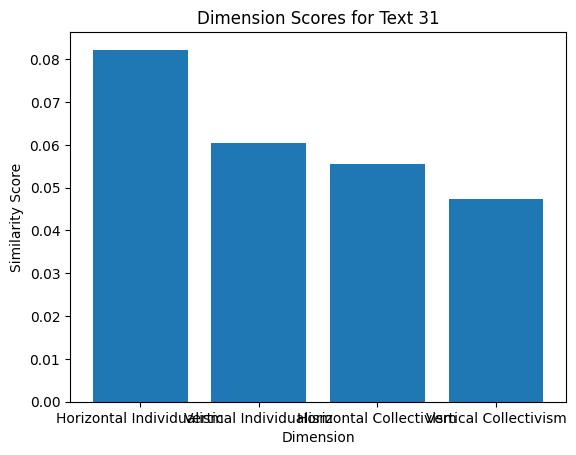

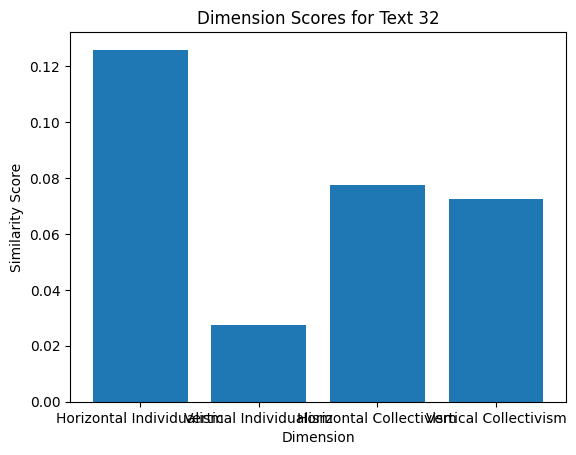

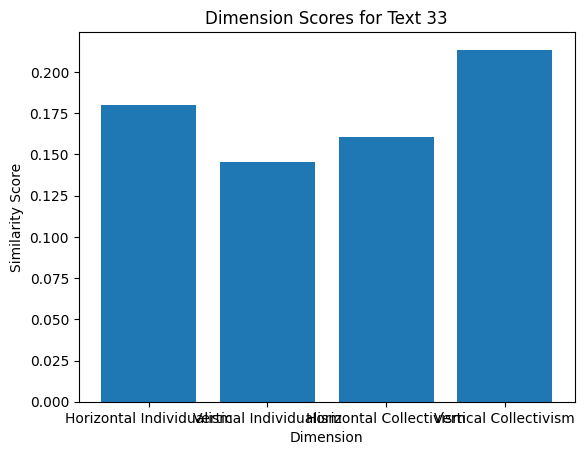

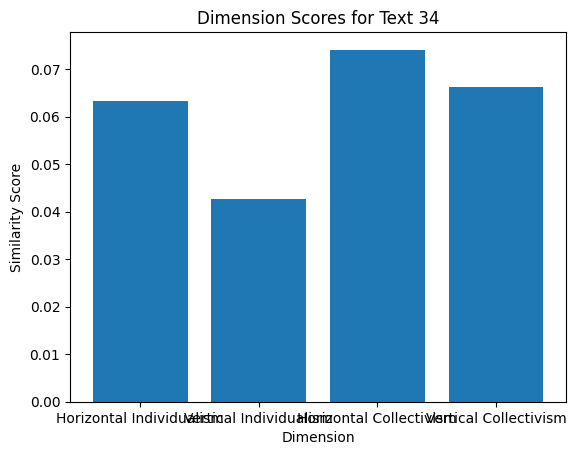

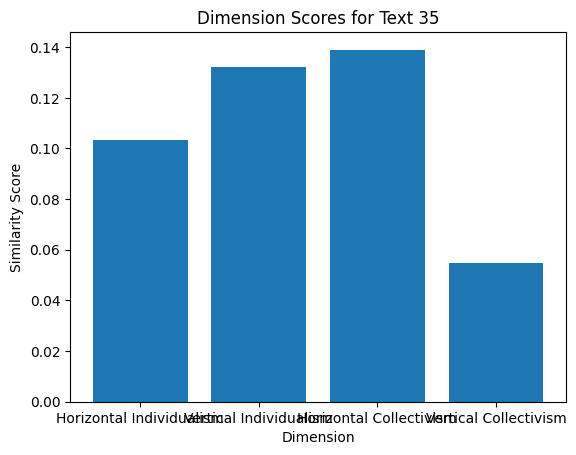

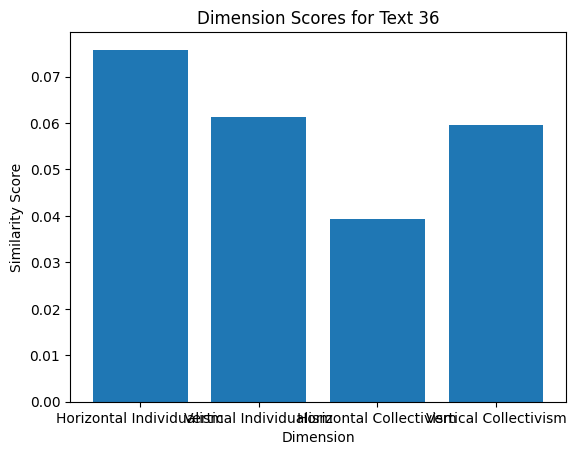

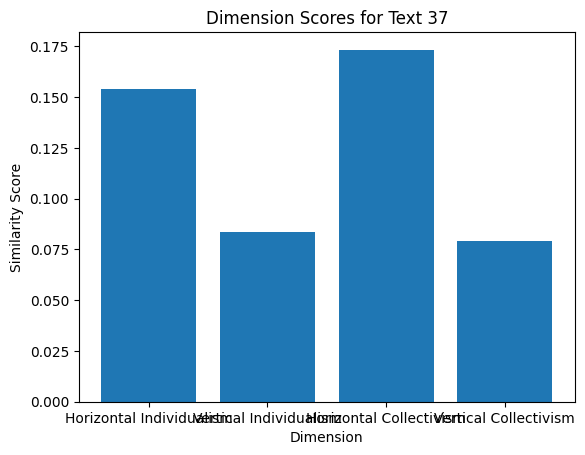

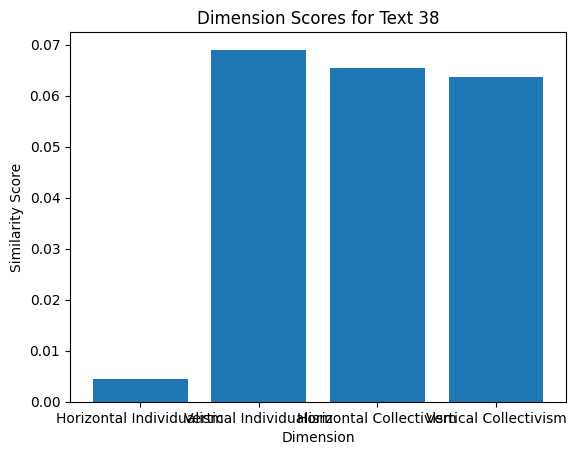

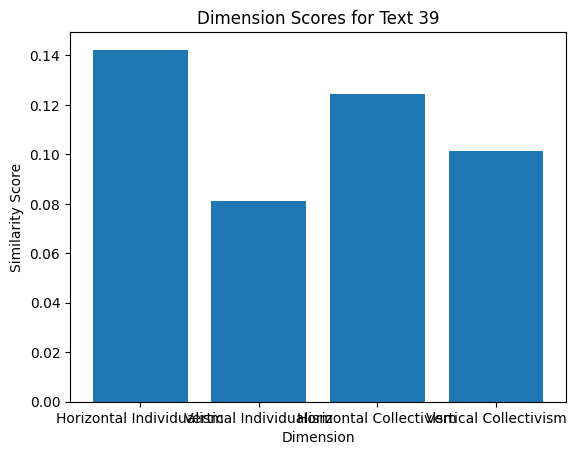

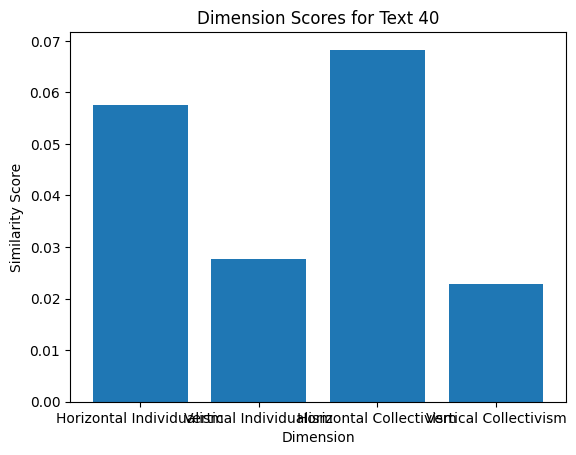

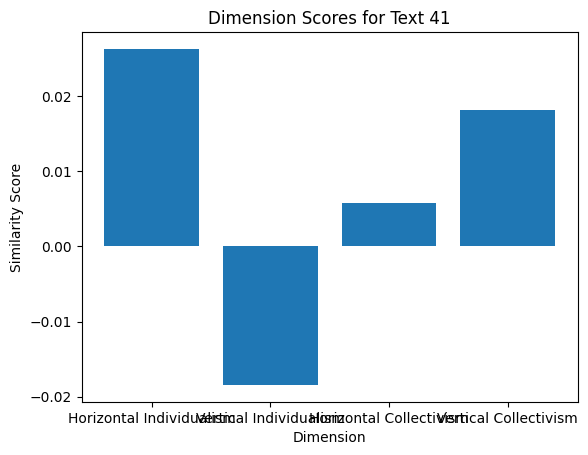

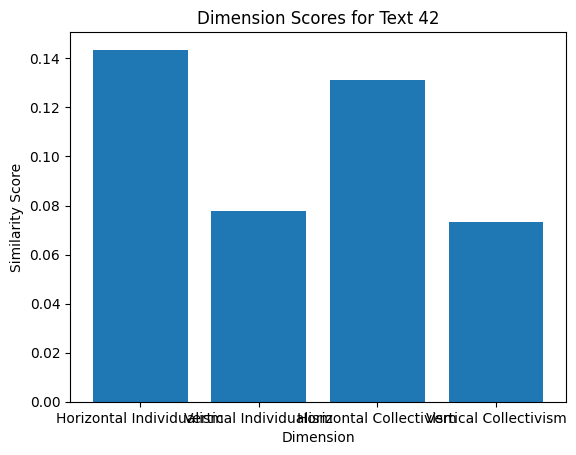

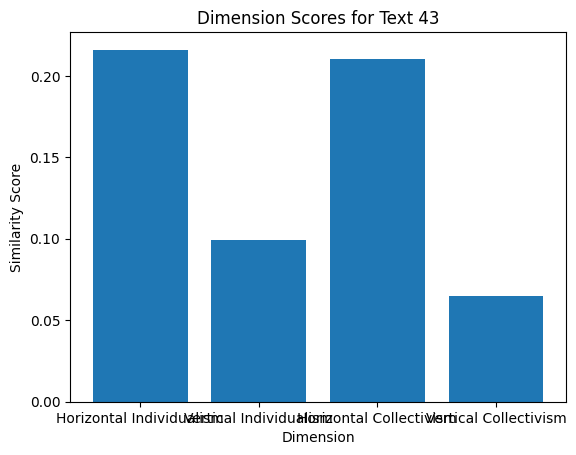

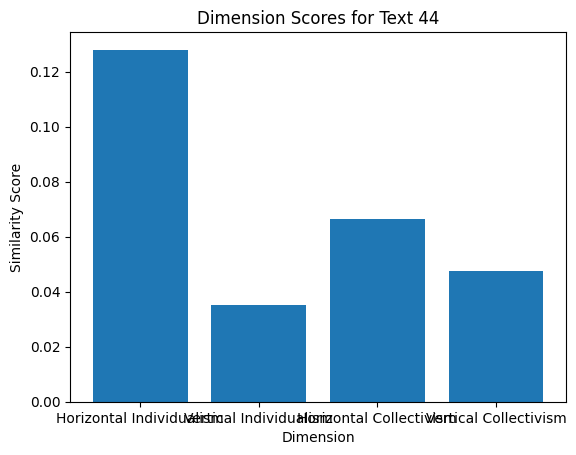

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [44]:
import matplotlib.pyplot as plt

# Suppose your CCR result DataFrame is named ccr_result_df
# and you’ve already computed dimension columns like "Individualism_score", "Collectivism_score", etc.
dimension_cols = [col for col in ccr_result_dataframe.columns if col.endswith("_score")]

# (Optional) If you have a lot of rows, you may limit to the first N
N = 5  # or 10, or however many you want to visualize
limited_df = ccr_result_dataframe

for i in range(len(limited_df)):
    # Extract the row
    row = limited_df.iloc[i]
    # Grab only the dimension scores for this row
    dimension_scores = row[dimension_cols]

    # Get dimension names without "_score" suffix
    dimension_names = [dim_col.replace("_score", "") for dim_col in dimension_cols]

    # Create a new figure for this text
    plt.figure()
    # Bar chart: x = dimension names, y = the row’s scores
    plt.bar(x=dimension_names, height=dimension_scores)

    # (Optional) If there's a specific ID or text snippet you'd like to show in the title, you can do:
    text_id = row.get("id", i)  # if you have an 'id' column, else just use i
    plt.title(f"Dimension Scores for Text {text_id}")
    plt.xlabel("Dimension")
    plt.ylabel("Similarity Score")

    plt.show()

In [45]:
#save csv
ccr_result_dataframe.to_csv( "ccr_result_dataframe.csv", index=False)

In [47]:
# print the 1 index text
print(ccr_result_dataframe.iloc[17]['text_clean'])

As London Grocery, we are a London-based local online grocery start-up that delivers UK wide. The main mission of London Grocery is to seamlessly deliver top quality fresh groceries to our customers, with 100% premium quality and customer satisfaction. When compared to traditional grocery supply chains, we differ in terms of contactless product acquisition, with having 75% less contact during the order preparation. Since we buy our products directly from the local wholesales market daily, we can deliver exclusive quality right at your door. With the daily supplied fresh groceries, you can receive fresh produce as if they had just been collected from the farm or access rare exotic fruits you won’t find anywhere else. The same procedure applies to our premium line of local meat and fish & seafood. The quality and premium taste is always closely tracked by our teams.

We aim to 100% maintain high quality standards and freshness in our products so that’s why we care about each order we rec

In [28]:
def plot_radar_chart(scores, labels, title="Radar Chart"):
    """
    scores: list or array of dimension scores (e.g. [0.3, 0.7, 0.5])
    labels: list of dimension names (e.g. ["Individualism", "Collectivism", "Altruism"])
    title: chart title
    """
    # Number of dimensions
    num_vars = len(labels)

    # Angles around the circle
    angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    # Close the polygon by repeating the first angle/scores
    angles = np.concatenate((angles, [angles[0]]))
    scores = np.concatenate((scores, [scores[0]]))

    # Create a single polar plot
    fig = plt.figure()
    ax = fig.add_subplot(projection="polar")

    # Plot data
    ax.plot(angles, scores, marker='o')
    ax.fill(angles, scores, alpha=0.25)  # fill the area

    # Set the angular ticks to the labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Optionally adjust the radial limits or labels
    # ax.set_ylim(0, 1)  # if your scores are between 0 and 1

    ax.set_title(title)
    plt.show()


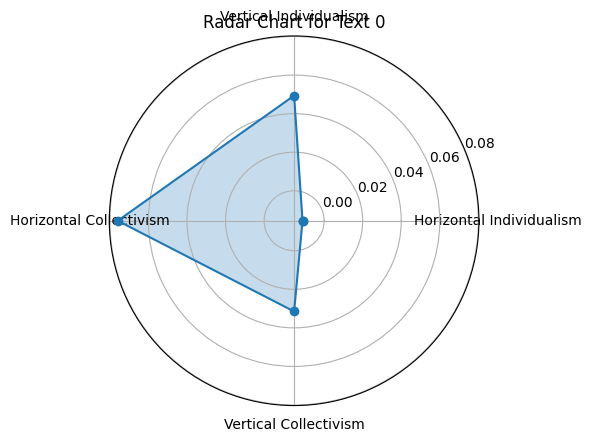

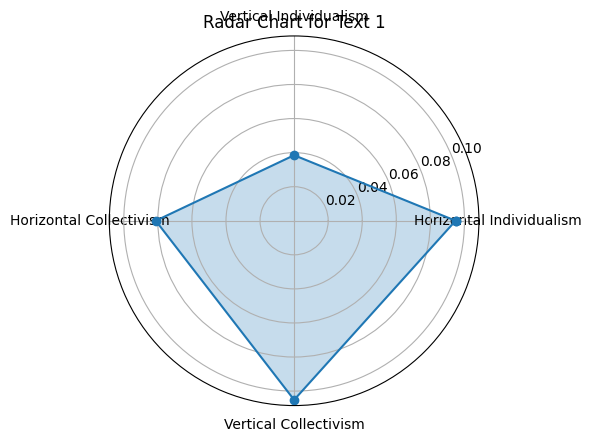

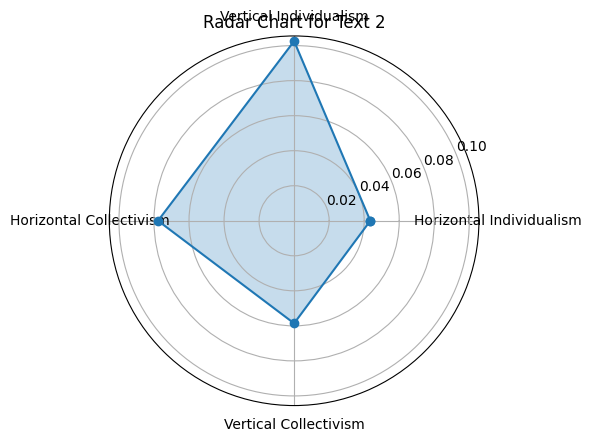

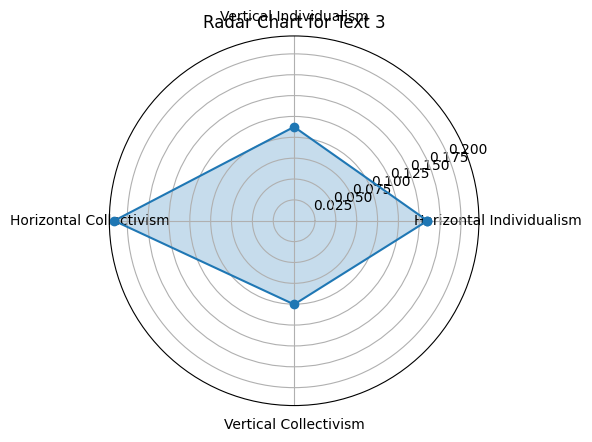

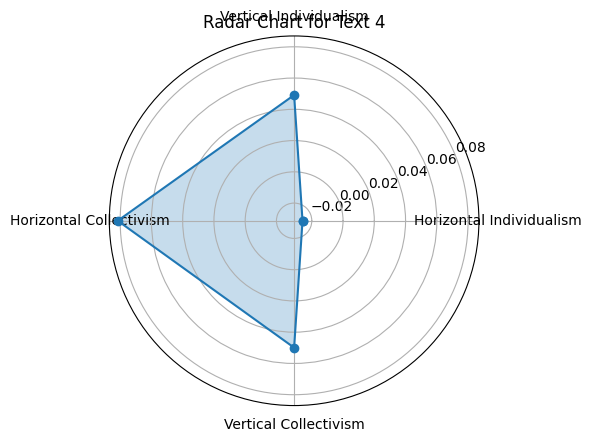

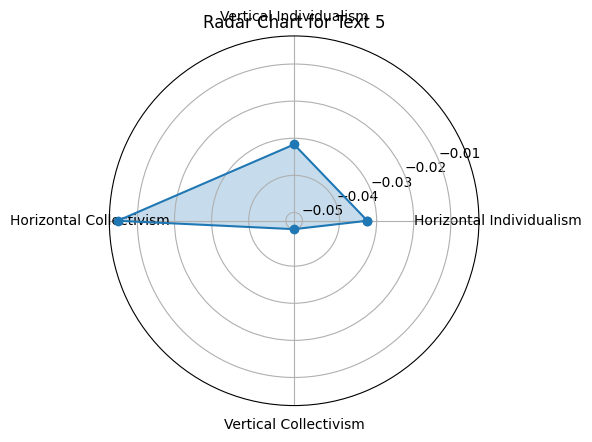

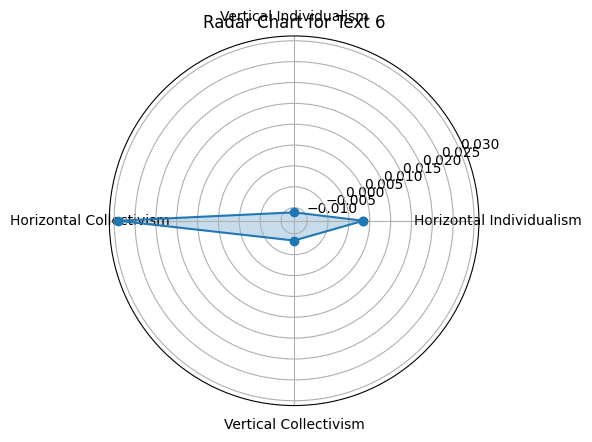

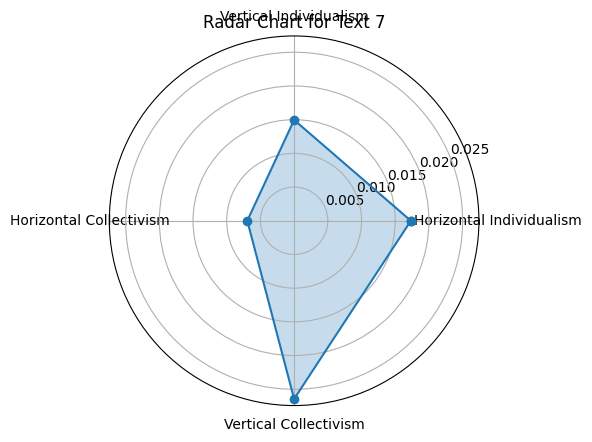

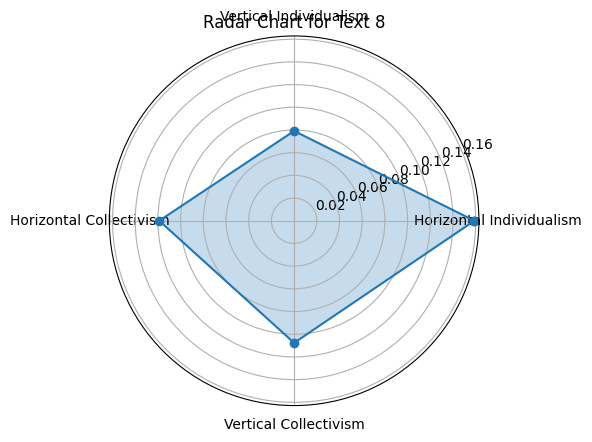

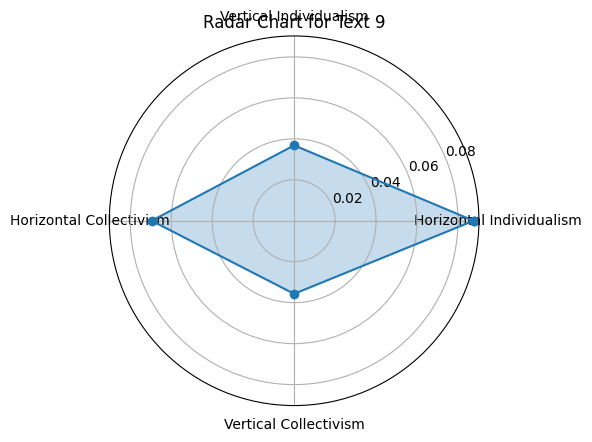

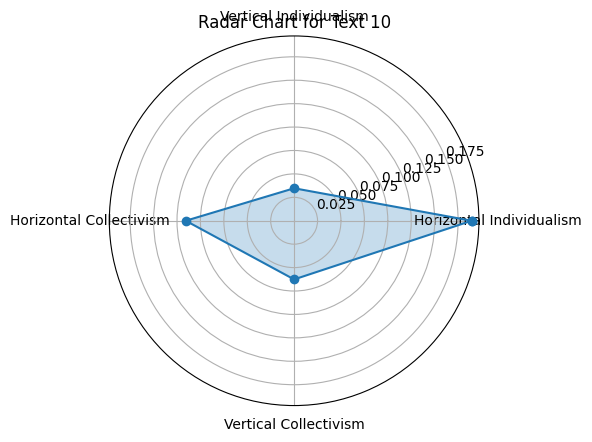

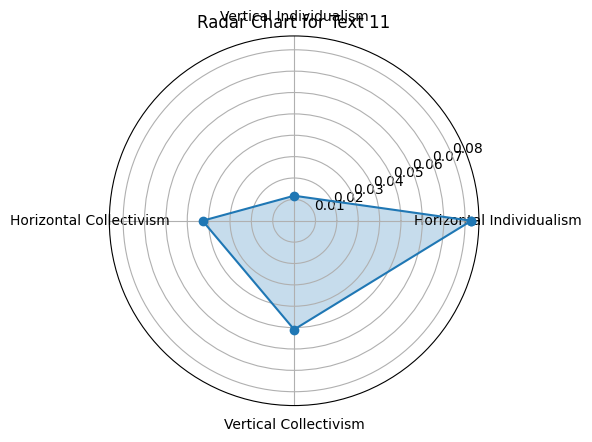

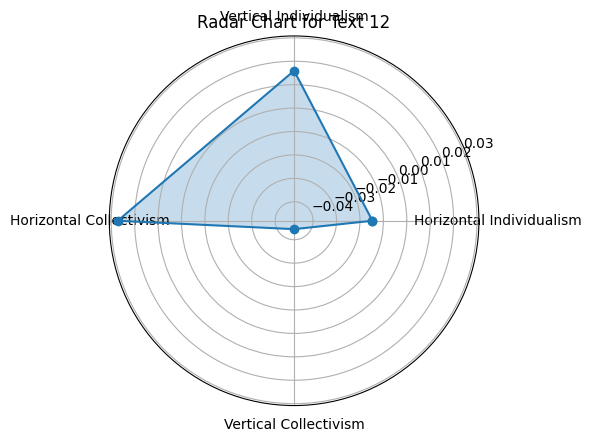

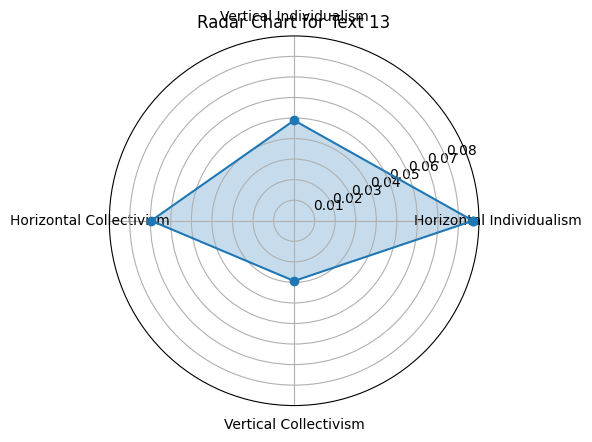

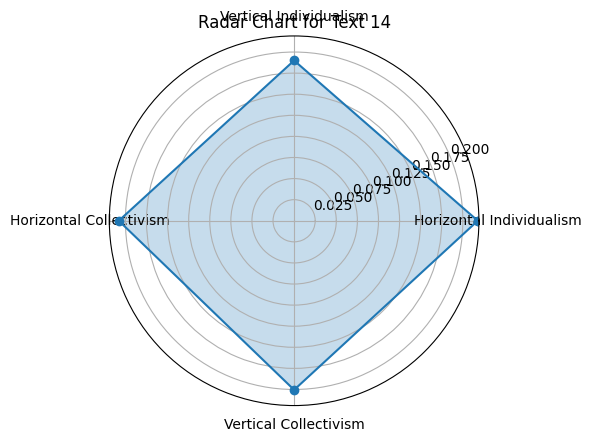

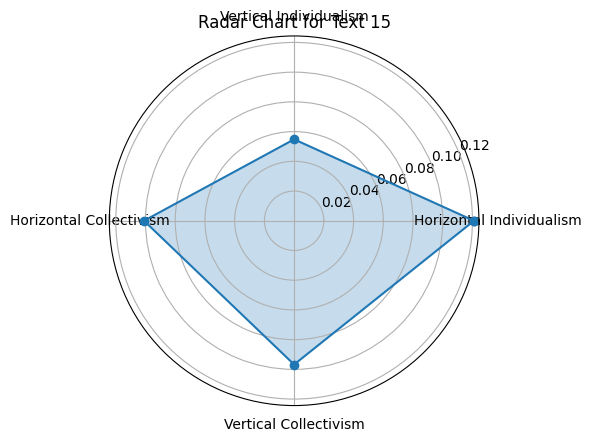

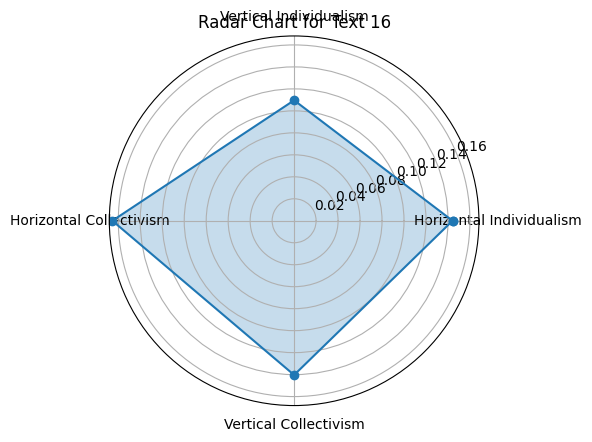

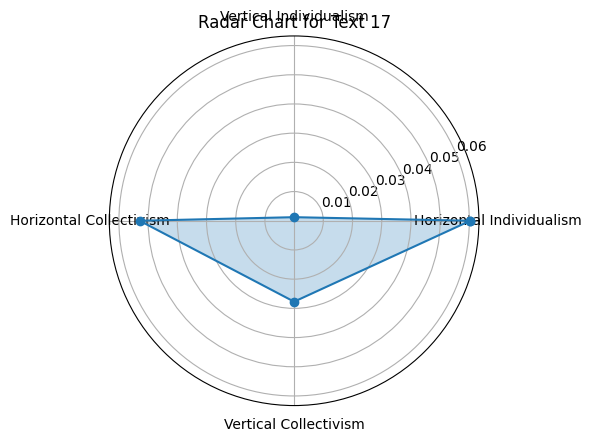

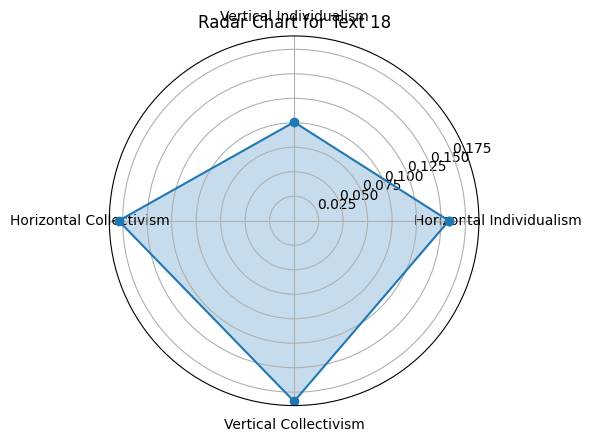

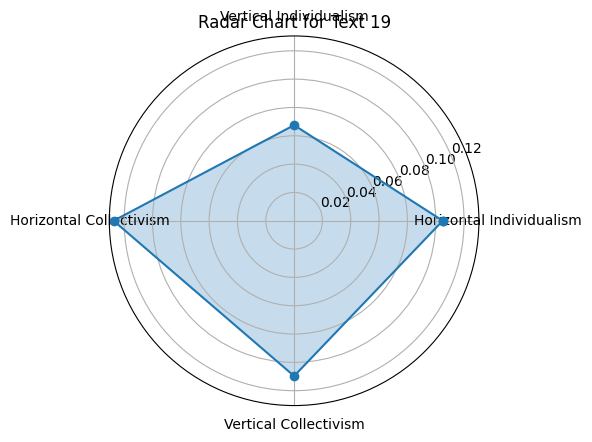

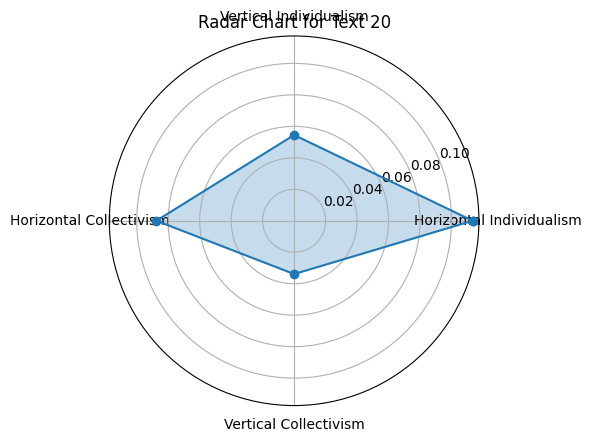

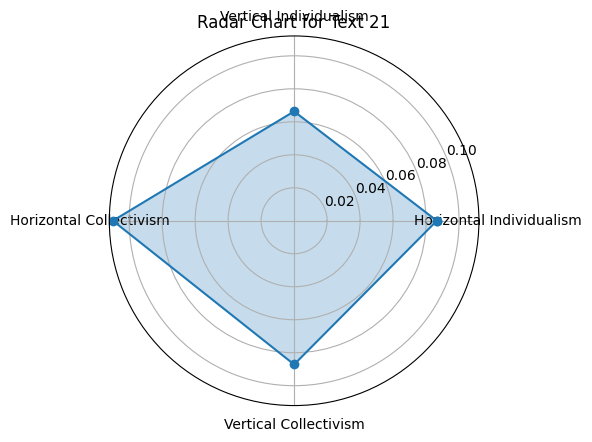

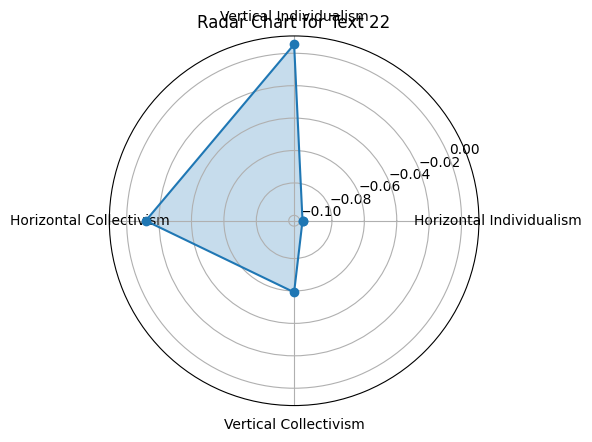

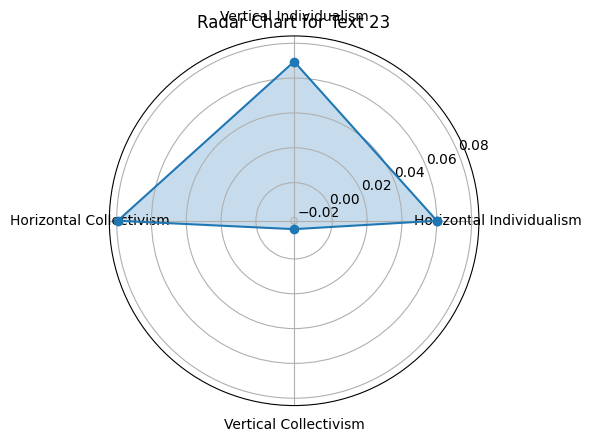

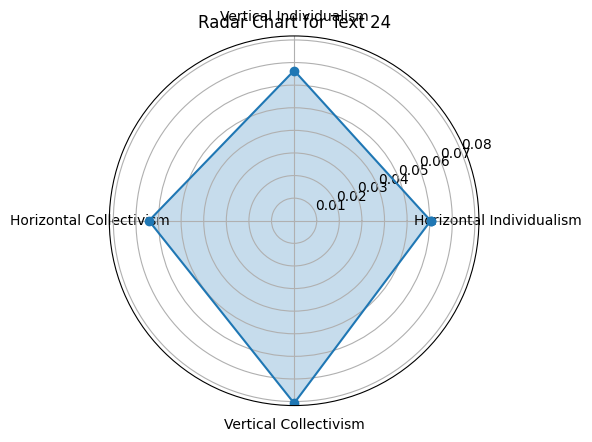

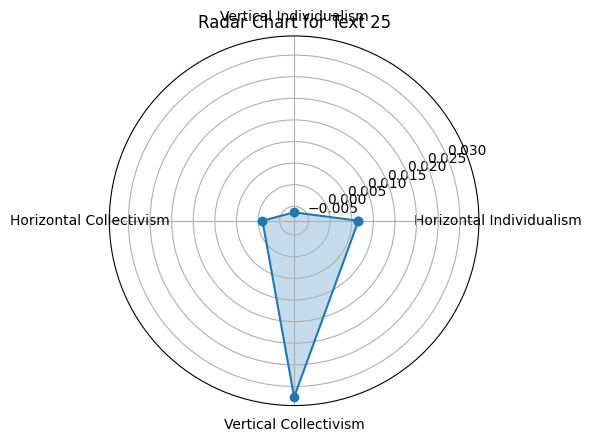

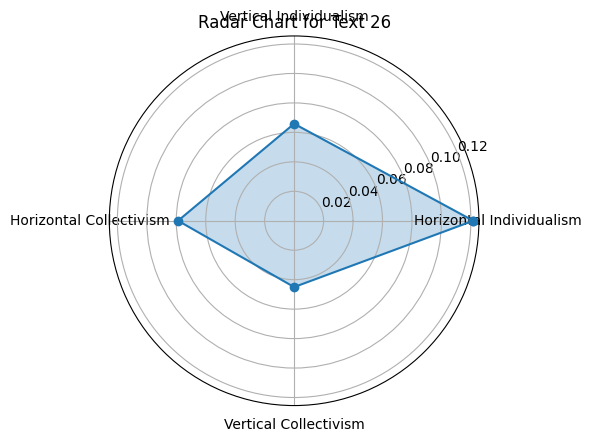

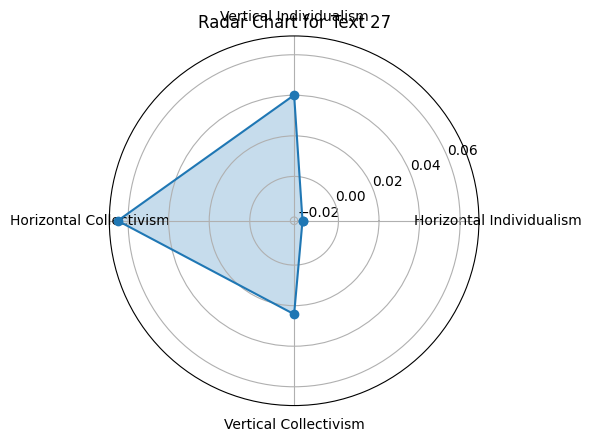

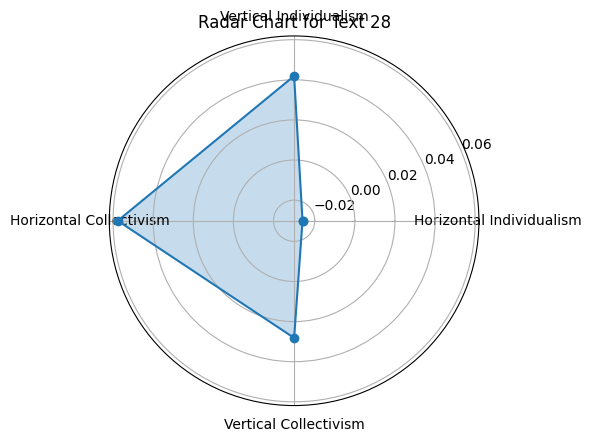

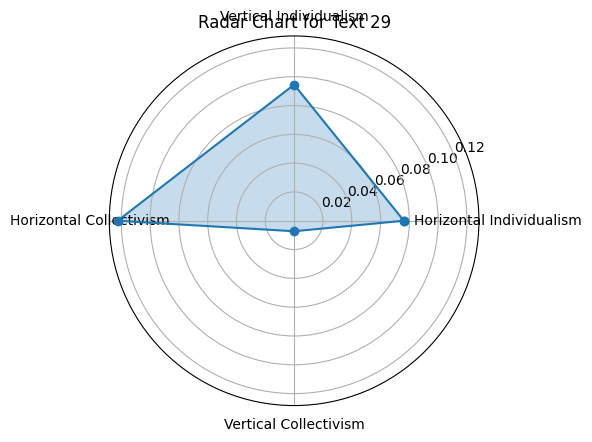

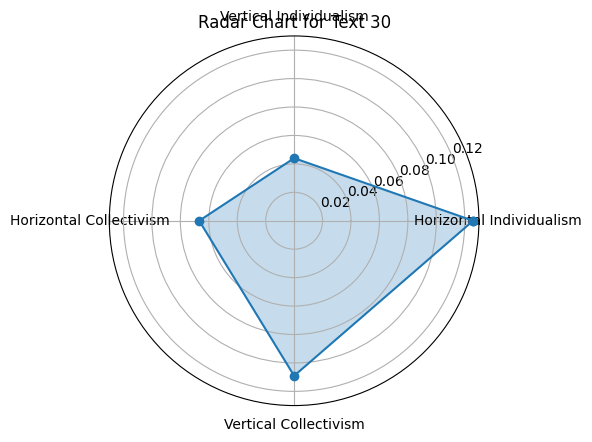

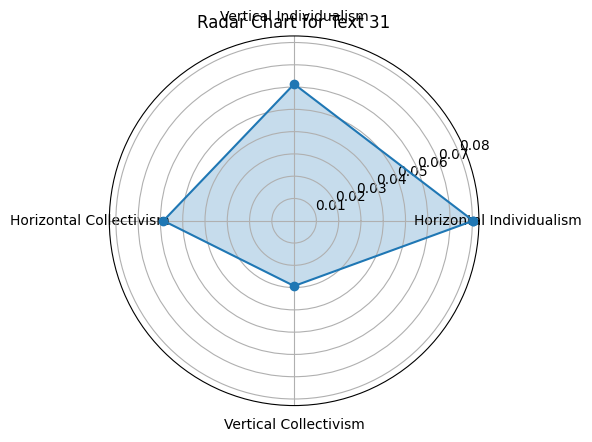

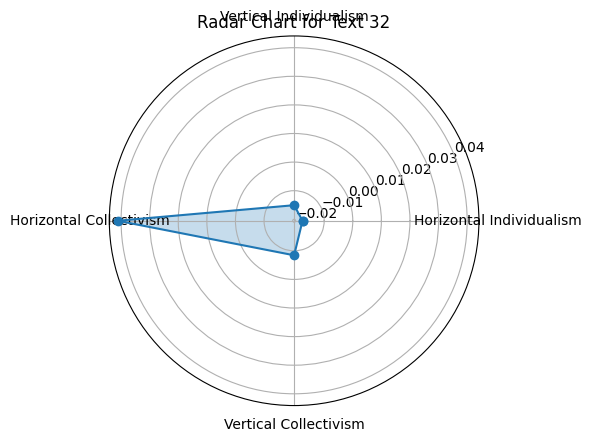

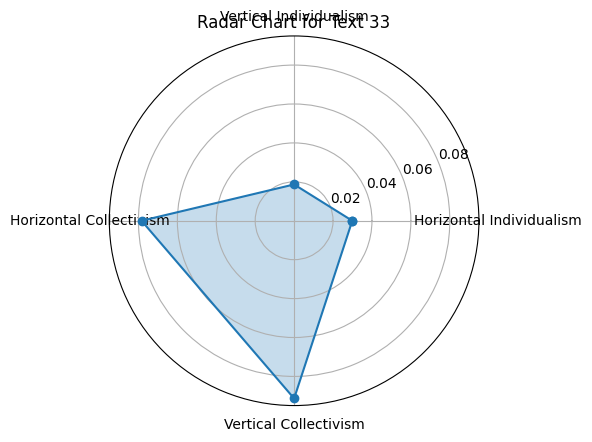

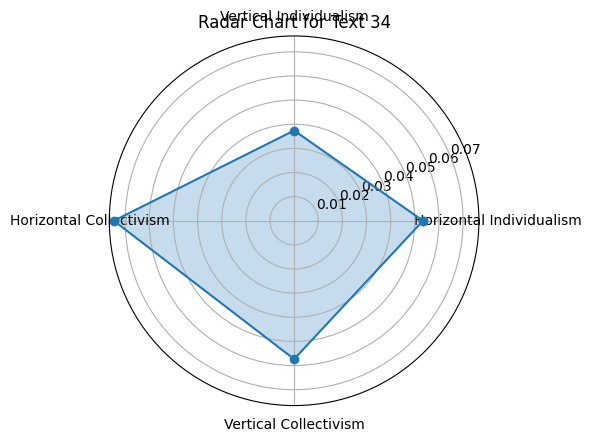

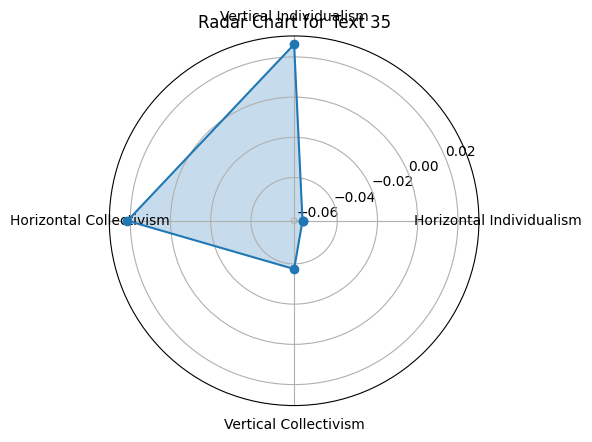

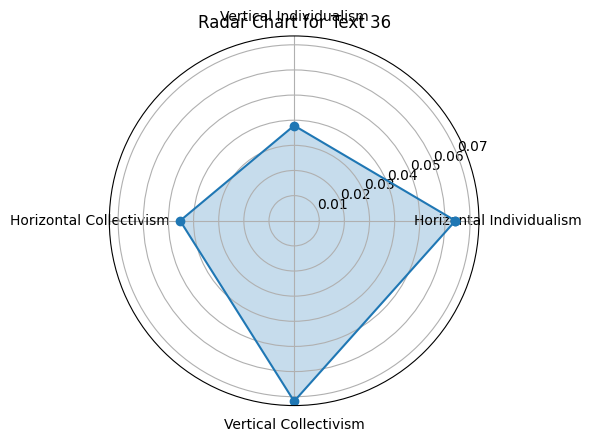

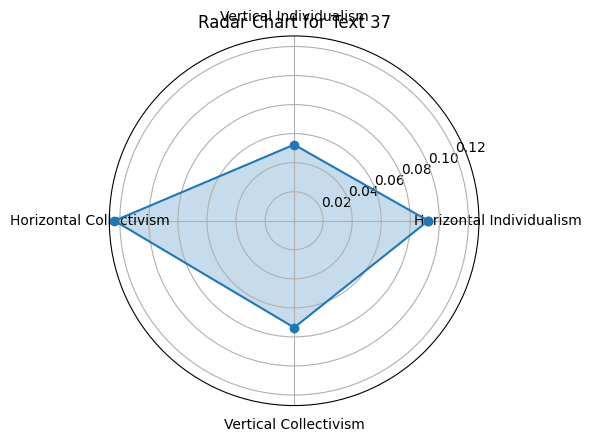

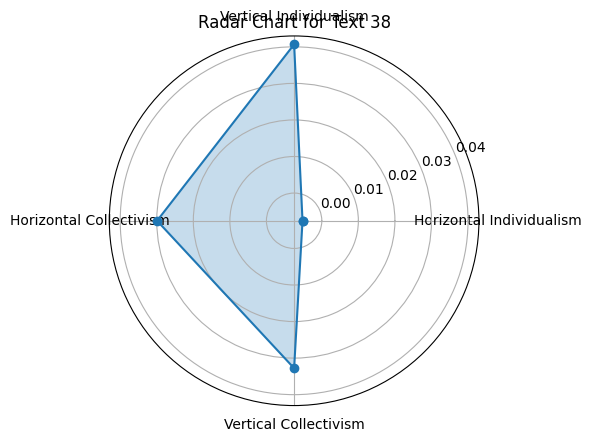

KeyboardInterrupt: 

In [29]:
for i in range(len(limited_df)):
    row = limited_df.iloc[i]

    # Extract just the dimension scores in the same order as dimension_cols
    scores = row[dimension_cols].values.astype(float)

    # Make labels by removing the "_score" suffix
    labels = [col.replace("_score", "") for col in dimension_cols]

    # Optional: if there's an "id" column or some other identifier, use it for the title
    text_id = row.get("id", i)  # fallback to row index if "id" doesn't exist

    plot_radar_chart(
        scores=scores,
        labels=labels,
        title=f"Radar Chart for Text {text_id}"
    )
